In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [3]:
np.random.seed(10)
data = pd.read_csv('../data/water_potability.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns[0:-2])
# mostra os dados
data.head(10)

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

Número de linhas e colunas na matriz de atributos: (2011, 10)


In [4]:
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mauc = []
macc = []
vn = []
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(x_train, y_train):
        # select rows
        x_t, x_validation = x_train[train_index], x_train[test_index]
        y_t, y_validation = y_train[train_index], y_train[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation) 
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])

Melhor n: 31  AUC: 0.6417991274076801


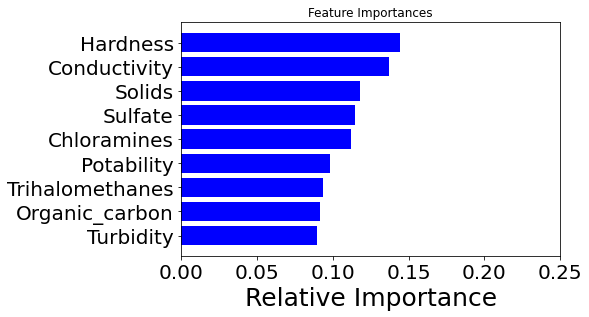

In [10]:
df = pd.read_csv('../data/water_potability.csv', header=(0))
importances = model.feature_importances_
attributes = df.columns[1:len(df.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()